In [30]:
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

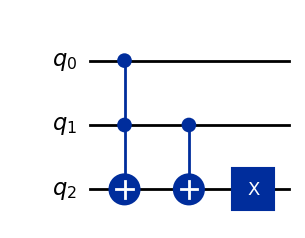

In [19]:
#Question 1

# Create a new circuit with two qubits
qc = QuantumCircuit(3)

# Add a Toffoli gate to qubit 0
qc.ccx(0, 1, 2)

# Perform a CNOT gate on qubit 1, controlled by qubit 2
qc.cx( 1,2)

# Perform NOT gate on qubit 2
qc.x(2)

qc.draw("mpl")

In [21]:
#Question 2

q = QuantumRegister(12) # 6 for input (a1,b1,c1) and (a2,b2,c2), 3 for carry, 3 for output (p,q,r)
c = ClassicalRegister(6)

qc = QuantumCircuit(q,c)


In [22]:
def full_adder(a, b, c_in, sum_out, c_out):
    qc.cx(q[a],q[sum_out])
    qc.cx(q[b],q[sum_out])
    qc.cx(q[c_in],q[sum_out])

    qc.ccx(q[a],q[b],q[c_out])
    qc.ccx(q[b],q[c_in],q[c_out])
    qc.ccx(q[a],q[c_in],q[c_out])

In [23]:
#apply full adder to each bit
full_adder(0,3,6,9,7)
full_adder(1,4,7,10,8)
full_adder(2,5,8,11,9)

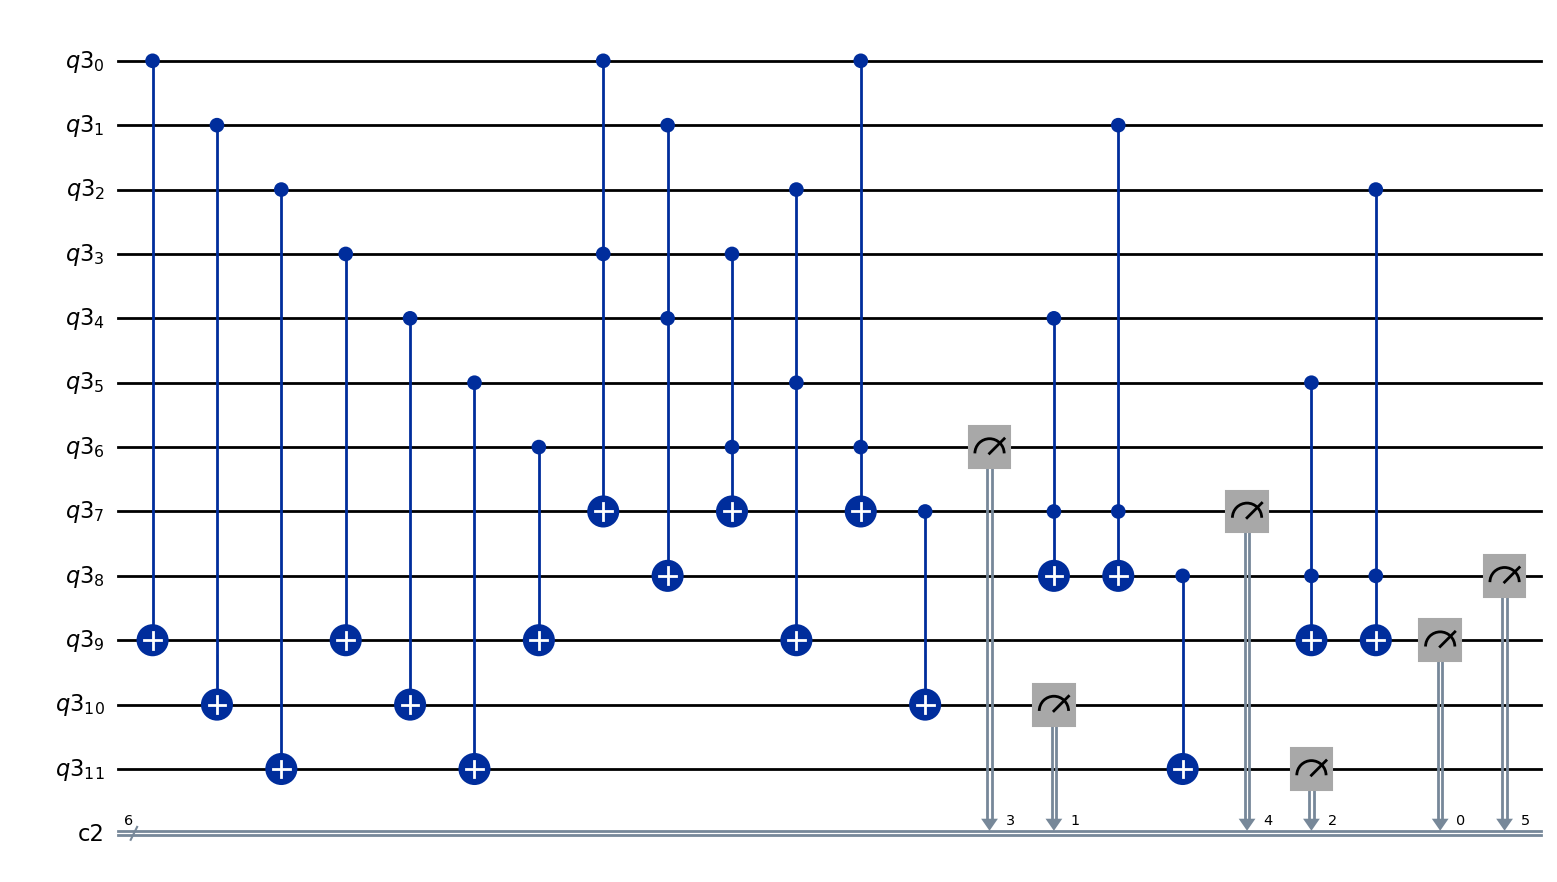

In [24]:
#measure
qc.measure(q[9],c[0])
qc.measure(q[10],c[1])
qc.measure(q[11],c[2])
qc.measure(q[6],c[3])
qc.measure(q[7],c[4])
qc.measure(q[8],c[5])
qc.draw("mpl")

In [32]:

print(qc)

                                                                           »
 q3_0: ──■──────────────────────────────────■───────────────────■──────────»
         │                                  │                   │          »
 q3_1: ──┼────■─────────────────────────────┼────■──────────────┼──────────»
         │    │                             │    │              │          »
 q3_2: ──┼────┼────■────────────────────────┼────┼─────────■────┼──────────»
         │    │    │                        │    │         │    │          »
 q3_3: ──┼────┼────┼────■───────────────────■────┼────■────┼────┼──────────»
         │    │    │    │                   │    │    │    │    │          »
 q3_4: ──┼────┼────┼────┼────■──────────────┼────■────┼────┼────┼──────────»
         │    │    │    │    │              │    │    │    │    │          »
 q3_5: ──┼────┼────┼────┼────┼────■─────────┼────┼────┼────■────┼──────────»
         │    │    │    │    │    │         │    │    │    │    │       ┌─┐»